Logistic Regression
============

## 가정
판변 분석에서 사용하는 동일한 개념의 분포 가정은 필수가 아니나,     
독립변수의 형태에 따라 전처리가 필요함 (dummy 화)

## Comfusion matrix

|예측/실제|Predict:True|Predict:False|
|---|---|---|
|<b>Actual:Positive</b>|TP|FP(False_Pasitive)|
|<b>Actual:Negative</b>|FN(False_Negative)|TN|

+ FN : Type_1_error

+ FP : Type_2_error

## 용어정리

1. Accuracy : $TP+TN\over ALL$

2. Precision : $TP\over TP+FP$

3. Recall : $TP\over TP+FN$

4. Fallout(FPR) : $FN\over TN+FN$

5. Specify(TFR) : $TN\over TN+FN$

Logistic Regression
----------------

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn.model_selection as sms
import sklearn.metrics as skm

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
plt.rcParams["font.family"]="BM YEONSUNG"
plt.rcParams["figure.figsize"]=(8,5)

In [5]:
Data=pd.read_excel("https://data.hossam.kr/E05/gradeuate.xlsx")

In [6]:
data=pd.DataFrame(Data)

In [10]:
train_data,test_data=sms.train_test_split(data,test_size=0.3,random_state=1)

### 테스트 데이터 만들어서 학습시키기

In [11]:
train_y=train_data["합격여부"]
test_y=test_data["합격여부"]

In [14]:
train_x=sm.add_constant(train_data[train_data.columns.difference(["합격여부"])])
test_x=sm.add_constant(test_data[train_data.columns.difference(["합격여부"])])

In [15]:
model=sm.Logit(endog=train_y,exog=train_x)

In [28]:
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.581986
         Iterations 5


In [52]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   합격여부   No. Observations:                  280
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            3
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                 0.06918
Time:                        11:50:28   Log-Likelihood:                -162.96
converged:                       True   LL-Null:                       -175.07
Covariance Type:            nonrobust   LLR p-value:                 2.243e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2137      1.332     -2.412      0.016      -5.825      -0.603
병원경력          -0.5199      0.150     -3.464      0.001      -0.814      -0.226
필기점수           0.0016      0.001      1.232      0.218      -0.001       0.004
학부성적           0.8184      0.398      2.058      0.040       0.039       1.598
==============================================================================
"""

#### Confusion_Matrix

방법 1

In [92]:
confu_matrix=pd.DataFrame(result.pred_table())
confu_matrix.index=['Positive','Negative']
confu_matrix.columns=["True","False"]
confu_matrix

,True,False
Positive,176.0,15.0
Negative,72.0,17.0


방법 2

In [64]:
skm.confusion_matrix(train_y,result.predict(train_x).apply(lambda x: True if x>=0.5 else False))

array([[176,  15],
       [ 72,  17]], dtype=int64)

In [66]:
result.prsquared

0.0691847196354698

### 시각화 (ROC_AUC_CURVE)

In [74]:
auc=skm.roc_auc_score(train_y,result.predict(train_x).apply(lambda x: True if x>=0.5 else False))

In [71]:
data=skm.roc_curve(train_y,result.predict(train_x).apply(lambda x: True if x>=0.5 else False)) #->fpr,tpr,_

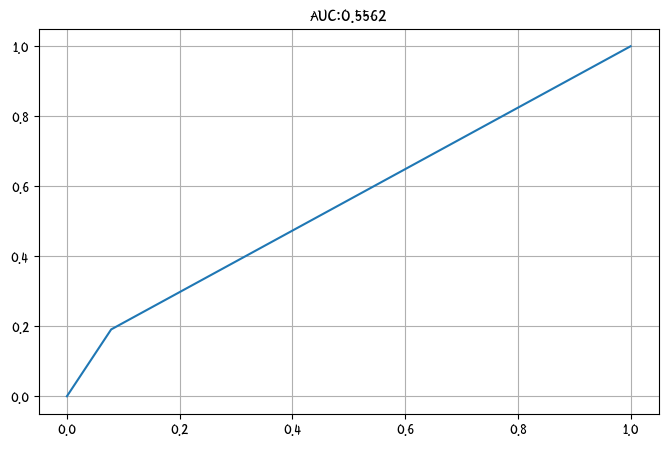

In [84]:
plt.figure()
sb.lineplot(x=data[0],y=data[1])
plt.grid()
plt.title("AUC:{:.4f}".format(auc))
plt.show()
plt.close()